# Project: Spotify Listener Preferences Across Countries

# Business Question
“Do users from the US, India, and Germany listen to music genres in the same proportions, or do we need to regionalize playlists?”

# Step 1: Sample Data Setup

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Genre counts sampled from each country
data = {
    "Genre": ["Pop", "Hip-Hop", "Rock", "EDM", "Classical"],
    "US": [150, 120, 130, 100, 50],
    "India": [180, 160, 80, 70, 60],
    "Germany": [140, 100, 160, 110, 90]
}

df = pd.DataFrame(data)
df.set_index("Genre", inplace=True)
df.head()


,US,India,Germany
Genre,,,
Pop,150,180,140
Hip-Hop,120,160,100
Rock,130,80,160
EDM,100,70,110
Classical,50,60,90


# Step 2: Chi-Square Test for Homogeneity

In [20]:
def run_chi_square_homogeneity_test(df):
    chi2_stat, p, dof, expected = chi2_contingency(df.T)
    return {
        "Chi-Square Statistic": chi2_stat,
        "Degrees of Freedom": dof,
        "p-value": p,
        "Significant (α=0.05)": p < 0.05,
        "Expected Table": pd.DataFrame(expected, index=df.columns, columns=df.index)
    }

result = run_chi_square_homogeneity_test(df)
result


{'Chi-Square Statistic': 65.74426460316717,
 'Degrees of Freedom': 8,
 'p-value': 3.438326309198616e-11,
 'Significant (α=0.05)': True,
 'Expected Table': Genre           Pop     Hip-Hop        Rock        EDM  Classical
 US       152.058824  122.941176  119.705882  90.588235  64.705882
 India    152.058824  122.941176  119.705882  90.588235  64.705882
 Germany  165.882353  134.117647  130.588235  98.823529  70.588235}

# Step 3: Visualize Observed vs Expected

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_17176\3365214054.py:7: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\WINDOWS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


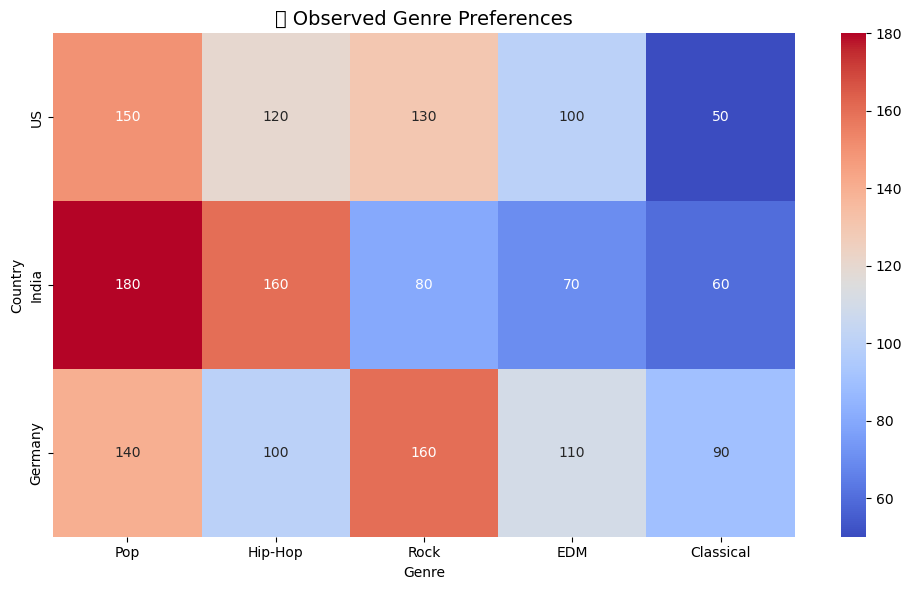

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_17176\3365214054.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\WINDOWS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


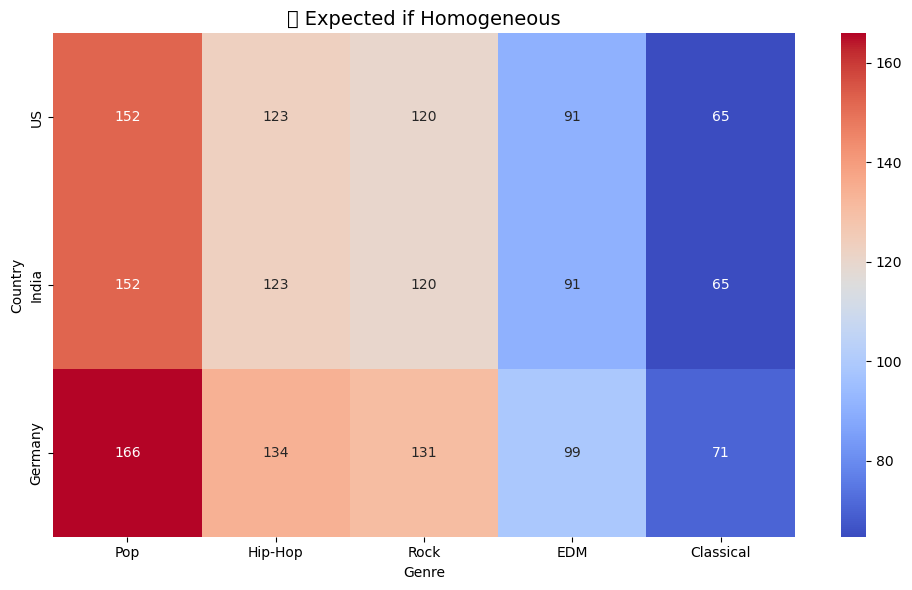

In [23]:
def plot_genre_country_heatmap(df, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df, annot=True, fmt=".0f", cmap="coolwarm")
    plt.title(title, fontsize=14)
    plt.ylabel("Country")
    plt.xlabel("Genre")
    plt.tight_layout()
    plt.show()

# Observed and expected
plot_genre_country_heatmap(df.T, "🎵 Observed Genre Preferences")
plot_genre_country_heatmap(result["Expected Table"], "📊 Expected if Homogeneous")


# Step 4: Executive Summary Function

In [26]:
def executive_summary_homogeneity(result, alpha=0.05):
    print("🌍 Chi-Square Test of Homogeneity Summary\n")
    print(f"Chi-Square Statistic: {result['Chi-Square Statistic']:.2f}")
    print(f"Degrees of Freedom: {result['Degrees of Freedom']}")
    print(f"p-value: {result['p-value']:.4f}")
    if result['p-value'] < alpha:
        print("🚨 Listener preferences differ significantly by country.")
        print("📌 Recommendation: Localize recommendations, ads, and curated playlists.")
    else:
        print("✅ Genre preferences appear consistent across regions.")
        print("📌 Global strategy can remain unified for now.")

executive_summary_homogeneity(result)


🌍 Chi-Square Test of Homogeneity Summary

Chi-Square Statistic: 65.74
Degrees of Freedom: 8
p-value: 0.0000
🚨 Listener preferences differ significantly by country.
📌 Recommendation: Localize recommendations, ads, and curated playlists.
